Key purpose of multivariate analysis is data preprocessing (data prepration), namely:
*  Dimentionality reduction
* feature extraction

#Dimentionality reduction

* **feature selection**: the task of the selection of input variables
* **feature extraction**: the task of transferring the original input varibles to the set of new factors.  

#Dimensionality reduction
Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset.

The most popular techniques for Dimensionality reduction:

* LDA (Linear Discremenant analysis)
* PCA (principle component analysis)
* K_means clustering 


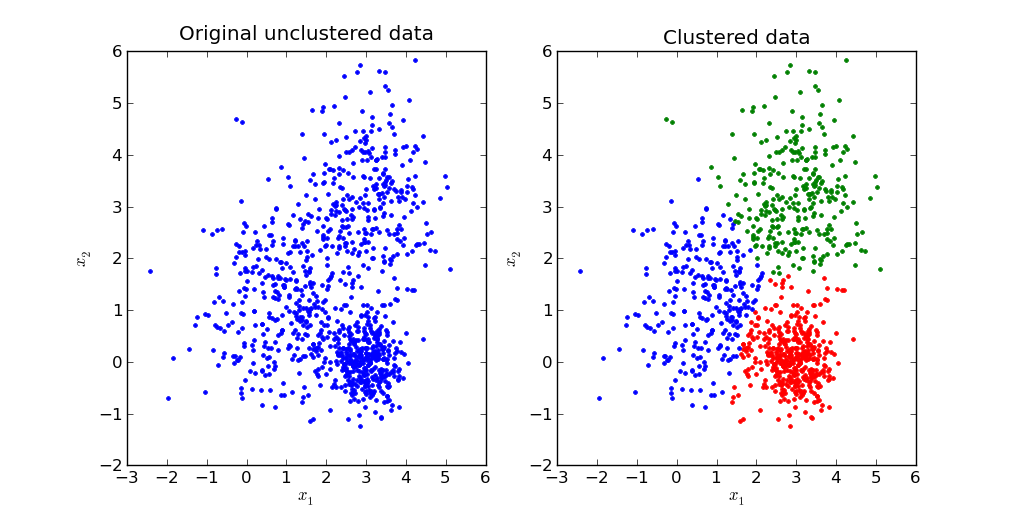

#LDA (Linear discrimenet analysis) model?
Consider a situation where you have plotted the relationship between two variables where each color represents a different class. One is shown with a red color and the other with blue.

 



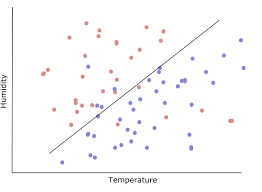

If you are willing to reduce the number of dimensions to 1, you can just project everything to the x-axis as shown below: 
 

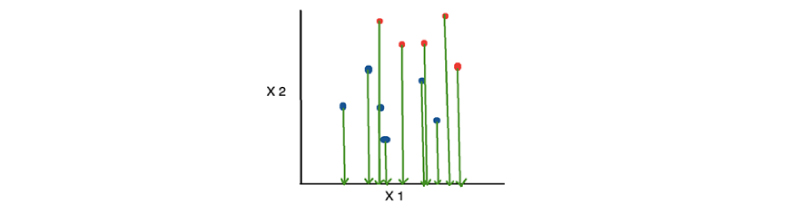

# LDA for a dataset with 3 classes

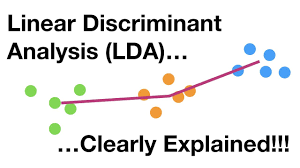

#Note:

LDA is a supervised Technique. It means that you need to idenfity input and output varibles. LDA can only take the categorical variable as the output varible. 

# Example 1: (LDA on Iris dataset)

In [ ]:
from pandas import read_csv
data=read_csv('Iris.csv')
X=data.drop('Species',axis=1) # input variables
y=data['Species'] # output variable 
X.head()
 
 
# number of features=min(number of input variables, number of classes of the output variable -1)=2


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import pandas as pd
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) # LDA is supervised learning 
df=pd.DataFrame(X_lda)
df.columns=['LDA1','LDA2']
df.head()
 

,LDA1,LDA2
0,8.084953,0.328454
1,7.147163,-0.755473
2,7.511378,-0.238078
3,6.837676,-0.642885
4,8.157814,0.540639


In [ ]:
df.shape

(150, 2)

In [ ]:
lda_model.explained_variance_ratio_

array([0.99147248, 0.00852752])

# how to specify the number of LDAs:
number of extracted features=min(#classes(of output variable)-1,#input variables)

i.e. 

the number of classes for species-1=3-1=2

the number of input variables =4

number of LDAs=min(2,4)=2

#Example: apply dt classifier on Iris dataset

Apply DT classifer on Iris dataset where the output variable is Species. Evaluate the model in 1000 mc runs. 

In [ ]:
import time

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
start = time. time()
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
processing_time=end-start
print(processing_time)

Accuracy using 1000 MC run: 0.9462444444444446
3.9290335178375244


# Second step (LDA+Decision tree)
Apply LDA then run dt on the output of lda evalute the classifier in 1000 MC runs

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) # LDA is supervised learning 

df=pd.DataFrame(X_lda)
df.columns=[['lda1','lda2']]
df.head(4)

,lda1,lda2
0,8.084953,0.328454
1,7.147163,-0.755473
2,7.511378,-0.238078
3,6.837676,-0.642885


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
start=time. time()
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
print(end-start)


Accuracy using 1000 MC run: 0.9618666666666668
3.4660584926605225


# Example 2: (LDA on Seed_Data)

* Apply LDA to extract features where the output variable is target. 

*  How many LDAs can explain at least 85% of data variance?

*  apply logistic regression before and after LDA implementation, and discuss on results. 



In [ ]:
sd = pd.read_csv('Seed_Data.csv')
#print(sd.head())
X=sd.drop('target', axis=1)
y=sd['target']
print(y.unique())
X.shape


[0 1 2]


(210, 7)

In [ ]:
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) # LDA is supervised learning 
df=pd.DataFrame(X_lda)
df.columns=[['lda1','lda2']]
df.head(4)

,lda1,lda2
0,-0.431322,-3.447686
1,-0.752869,-4.183980
2,-1.093932,-2.958675
3,-1.768020,-3.252414


In [ ]:
lda_model.explained_variance_ratio_

array([0.68141241, 0.31858759])

we need to use both ldas to cover 85%

** We apply logistic regression on Seed_Data with origina input variables 

In [ ]:
import time


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
start = time. time()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
acc = [] ### Blank vector
for i in range(100):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)# split dataset
  model_dt=LogisticRegression() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 100 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 100 MC run: 0.9179365079365079
processing time: 7.9089274406433105


** We apply logistic regression on Seed_Data with extracted LDAs 

In [ ]:
start=time.time()
acc = [] ### Blank vector
for i in range(100):
  X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)# split dataset
  model_dt=LogisticRegression() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 100 MC run:", np.mean(acc))  
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 100 MC run: 0.968095238095238
processing time: 1.1742558479309082


#Conclusion: 
1. using LDA+logistic regression, the accuracy is .97 which is way higher than accuray of the logistic regression without LDA i.e. 0.91

2. since we use two feature to train the logistic regression classifier, it is faster than traditional implementation. 

#Example (credit card analytics)
link for dataset:  https://data.world/sonaksh/bank-customer-credit-details/workspace/file?filename=credit_card_dataset.csv

# output variable is gender
## other variables are input

### apply logistic regression : we need to rescale the  input dataset. 

In [ ]:
from pandas import read_csv
data=read_csv('/content/credit_card_dataset.csv')
data.head()
dataset=data.dropna()
 
X=dataset.drop(['Gender','Loan Amount'], axis=1)
print(X.head())
y=dataset['Gender']
y.value_counts()
X.info()

   Age  Family Size   Income  Expenditure  Use Frequency  Overdue  \
0   30            4  50000.0      22199.0              6        5   
1   44            6  51000.0      19999.0              4        3   
2   30            3  58450.0      27675.0              5        6   
3   29            5  45767.0      12787.0              3        7   
4   34            4  43521.0      11999.0              3        2   

    Debt Record   Returned Cheque   Dishonour of Bill  
0       42898.0                 6                   9  
1       33999.0                 1                   5  
2       20876.0                 3                   1  
3       11000.0                 0                   4  
4       43898.0                 1                   2  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 449 non-null    int64 

# data prepartion 


In [ ]:
c=X.columns
 

In [ ]:

#rescale the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #  normal scaler 
# Fit your data on the scaler object
scaled_X = scaler.fit_transform(X)
from pandas import DataFrame
df=DataFrame(scaled_X)
df.columns=c
df.head()


,Age,Family Size,Income,Expenditure,Use Frequency,Overdue,Debt Record,Returned Cheque,Dishonour of Bill
0,0.230769,0.4,0.023994,0.246521,0.571429,0.500,0.476644,0.666667,1.000000
1,0.589744,0.8,0.025103,0.205431,0.285714,0.250,0.377767,0.111111,0.555556
2,0.230769,0.2,0.033366,0.348798,0.428571,0.625,0.231956,0.333333,0.111111
3,0.205128,0.6,0.019299,0.070731,0.142857,0.750,0.122222,0.000000,0.444444
4,0.333333,0.4,0.016808,0.056013,0.142857,0.125,0.487756,0.111111,0.222222


In [ ]:
df.shape

(449, 10)

In [ ]:
y.value_counts()

MALE      253
FEMALE    196
Name: Gender, dtype: int64

# number of LDAs: min(10,2-1)=1

# apply the logistic reg on the original dataset

In [ ]:
import time

In [ ]:
start = time. time()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)# split dataset
  model_lr=LogisticRegression() # model
  lr = model_lr.fit(X_train,y_train) # fit the model
  YPred = lr.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 1000 MC run: 0.5584518518518519
processing time: 20.023054361343384



# redo the above analysis after lda implementation 



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from pandas import DataFrame
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(df, y) # LDA is supervised learning 
DF=DataFrame(X_lda)
DF.columns=[['F']]
DF.head(4)

,F
0,-1.104344
1,0.343734
2,0.703130
3,1.191392


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from pandas import DataFrame
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(df, y) # LDA is supervised learning 
DF=DataFrame(X_lda)
DF.columns=[['F']]
DF.head(4)
start = time. time()
# DF: is an extracted feature of scaled input variables 
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(DF,y,test_size=0.3)# split dataset
  model_dt=LogisticRegression() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 1000 MC run: 0.5871037037037038
processing time: 8.946188688278198


# implementation of adaboostclassifier on the original dataset 

LDA+adaboostclassifier

processing time and accuracy.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
base=LogisticRegression() # model
ada_clf = AdaBoostClassifier(base_estimator=base, n_estimators=10)
start = time. time()

acc = [] ### Blank vector
for i in range(100):
  X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)# split dataset
  
  lr = ada_clf.fit(X_train,y_train) # fit the model
  YPred = lr.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 100 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 1000 MC run: 0.5578518518518519
processing time: 10.465514898300171


LDA+Adaboostclassifier 

In [ ]:
 
start = time. time()
# DF: is an extracted feature of scaled input variables 
acc = [] ### Blank vector
for i in range(100):
  X_train,X_test,y_train,y_test=train_test_split(DF,y,test_size=0.3)# split dataset
   
  dt = ada_clf.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 100 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 100 MC run: 0.5766666666666667
processing time: 11.017707586288452


#Conclusion:
 LDA+Logistic regression provide higher accuracy and lower computational load 

# Example (credit card dataset continu...)

redo the above example with PCA+logistic regression so that 90% of the orignial info (explained variance ratio) is preserved in the extracted features. 

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
model=pca.fit_transform(X)  #  unsupervised learning 
PF=DataFrame(model)
PF.shape
i=PF.iloc[0:449][0]
 
 

In [ ]:
 start = time. time()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
acc = [] ### Blank vector
for i in range(10):
  X_train,X_test,y_train,y_test=train_test_split(i,y,test_size=0.3)# split dataset
  model_lr=LogisticRegression() # model
  lr = model_lr.fit(X_train,y_train) # fit the model
  YPred = lr.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

TypeError: ignored

#Example 3: (LDA on wine dataset)

Apply LDA on wine dataset where the target variable the **Class label**. 

In [ ]:
import pandas as pd

df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
    header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines','Proline']
  

In [ ]:
df_wine.head(3)


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [ ]:
df_wine.shape

(178, 14)

In [ ]:

import numpy as np
print('Class labels:', np.unique(df_wine['Class label']))

Class labels: [1 2 3]


data prepration 

In [ ]:
from sklearn.model_selection import train_test_split
X = df_wine.iloc[:, 1:].values
y= df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)

#Apply decision tree on the original dataset 

In [ ]:
 import numpy as np
 from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
from sklearn.tree import DecisionTreeClassifier
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result


Accuracy using 1000 MC run: 0.9101851851851852


#Implement LDA for dimension reduction and the perform dt classifier 

In [ ]:
 from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) # LDA is supervised learning 

In [ ]:
X_lda.shape


(178, 2)

# number of LDAs=min(#classes-1,#input vars)

In [ ]:

LDA=pd.DataFrame(X_lda)
LDA.columns=[['lda1','lda2']]
LDA 

,lda1,lda2
0,-4.700244,1.979138
1,-4.301958,1.170413
2,-3.420720,1.429101
3,-4.205754,4.002871
4,-1.509982,0.451224
...,...,...
173,4.291508,3.390332
174,4.503296,2.083546
175,5.047470,3.196231
176,4.276155,2.431388


To obtain the variance corresponding to each component, you can access the following property:

In [ ]:
lda_model.explained_variance_ratio_

array([0.68747889, 0.31252111])

In [ ]:
LDA=pd.DataFrame(X_lda)
LDA.columns=[['lda1','lda2']]
LDA 

,lda1,lda2
0,-4.700244,1.979138
1,-4.301958,1.170413
2,-3.420720,1.429101
3,-4.205754,4.002871
4,-1.509982,0.451224
...,...,...
173,4.291508,3.390332
174,4.503296,2.083546
175,5.047470,3.196231
176,4.276155,2.431388


Apply dt classifier on the transformed data using LDA
 note that in below implementation, we have single input feature (lda1) and single output variable (class label)

In [ ]:
from sklearn.model_selection import train_test_split 
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(LDA,y,test_size=0.3, random_state=104)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result


Accuracy using 1000 MC run: 0.9911666666666666


#Example 4:

use **boston_house_price** dataset, consider **RAD** as the output variable, 

1.  apply LDA and extract the features. 

2.  specify the number of LDAs which explain 90% of the variance of data

3. apply logistic regression, Naive Bayes, decision tree on the original dataset to classify RAD

4. redo step 3 after LDA implementation. 





In [ ]:
data = pd.read_csv('/content/boston_house_prices.csv')
#print(sd.head())
X=data.drop('RAD', axis=1)
y=data['RAD']
y.unique()
min(13,8) # extract 8 features
 

8

In [ ]:
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) # LDA is supervised learning 
LDA=pd.DataFrame(X_lda)
LDA.columns=[['F1','F2','F3','F4','F5','F6','F7','F8']]
#LDA.iloc[:,0:2]  

In [ ]:
# to see the ratio of explained variance 

lda_model.explained_variance_ratio_
# use lda 1 and lda2 to explain the variace with at least 90%

array([0.89051137, 0.05422261, 0.024758  , 0.01122588, 0.00847558,
       0.00528663, 0.00371171, 0.00180822])

# part 3

In [ ]:
#dictionary of models
from sklearn.naive_bayes import GaussianNB
dt=DecisionTreeClassifier()
lr=LogisticRegression()
gnb=GaussianNB()

# define a function to launch the model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def launch_model(name,model, X, y):
  ACC=[]
  mc=100
  for i in range(mc):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) # testset is 30%
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    ACC.append(accuracy)
  print ('Accuracy test', mean(ACC))

In [ ]:
import time
start = time. time()

In [ ]:
start = time. time()
results = []
results.append(launch_model('dt', dt, X,y))
results.append(launch_model('Logistic reg', lr, X,y))
results.append(launch_model('gaussian nb', gnb, X,y)) 
end = time. time()


Accuracy test 0.8983552631578948
Accuracy test 0.5733552631578948
Accuracy test 0.5822368421052633


In [ ]:
print(end-start)

10.205389738082886


In [ ]:
start = time. time()
results = []
results.append(launch_model('dt', dt, LDA,y))
results.append(launch_model('Logistic reg', lr, LDA,y))
results.append(launch_model('gaussian nb', gnb, LDA,y)) 
end = time. time()

Accuracy test 0.7473026315789473
Accuracy test 0.6321052631578948
Accuracy test 0.6596710526315789


In [ ]:
print(end - start)

8.763484239578247


#PCA: principle component analysis--- unsupervised learning technique

# component: the extracted feature

*  the number of components (extracted features)= the number of input variables



# Example 4: (PCA on wine dataset)

In [ ]:
 
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA


In [ ]:
import numpy as np
import pandas as pd

df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
    header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines','Proline']
X=df_wine.drop('Class label', axis=1)
y=df_wine['Class label']

In [ ]:
X.shape

(178, 13)

In [ ]:
# define a matrix
import pandas as pd
 
# create the PCA instance
# the number of PCAs=the number of input variables
pca = PCA()
# fit on data
Feature=pca.fit_transform(X)
# access values and vectors
df=pd.DataFrame(Feature) 
#df.columns=['F1','F2','F3','F4']
df.head()

pca.explained_variance_ratio_  # select the number of important features given the ratio of variance 


array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

# visualize the variance ratio of pcas in terms of the number of features. 

Text(0, 0.5, 'variance ratio')

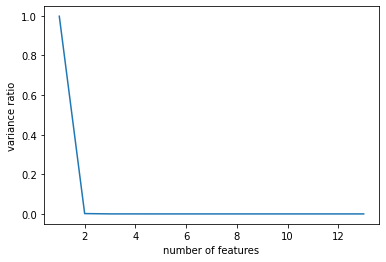

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(1,14)
y=pca.explained_variance_ratio_ 
plt.plot(x,y)
plt.xlabel('number of features')
plt.ylabel('variance ratio')

# based on the above plot # of important features is 2

#feature extraction 

*  how to specify the most important component at level 90%

In [ ]:
# define a matrix
 
# create the PCA instance
# the number of PCAs=the number of input variables
pca = PCA(13)
# fit on data
X_pca = pca.fit_transform(X)
pd.DataFrame(X_pca)

In [ ]:
import numpy as np
df_new=np.dot(X, df_pca) # inner product 
df_new=pd.DataFrame(df_new)

In [ ]:
#Variance explained by each component
print(df_new.explained_variance_)



In [ ]:
ratio_var=PCAs.explained_variance_/sum(PCAs.explained_variance_)
ratio_var

# Example: 
use **cancerdata** and 

1. apply PCA, compute the ratio of variance for each component and specify the number of most important features using ratio plot.  
 
2.  select the number of PCAs where at least 95% of information is preserved. 

In [ ]:
from pandas import read_csv
data=read_csv('/content/cancerdata.csv')
data.head()
X=data.drop(['id','diagnosis'],axis=1)
X.head()
y=data['diagnosis']
X.shape

(340, 30)

In [ ]:
# a

pca = PCA()
# fit on data
model=pca.fit_transform(X)
# access values and vectors
df=pd.DataFrame(model) 
 

In [ ]:
X.shape

(340, 30)

array([9.78243776e-01, 2.00526529e-02, 1.48232645e-03, 1.28670341e-04,
       8.04735968e-05, 6.82866563e-06, 3.79234176e-06, 8.45993239e-07,
       3.14351805e-07, 1.93260763e-07, 8.53678976e-08, 1.88036971e-08,
       8.32802394e-09, 5.58099685e-09, 3.56402168e-09, 1.45879504e-09,
       9.55158343e-10, 4.97373218e-10, 4.26914004e-10, 3.58743385e-10,
       1.63851443e-10, 1.33858755e-10, 9.76482295e-11, 6.73333628e-11,
       3.65170660e-11, 2.79210583e-11, 9.04644808e-12, 6.82995543e-12,
       4.89078368e-12, 1.90722324e-12])

Text(0, 0.5, 'variance ratio')

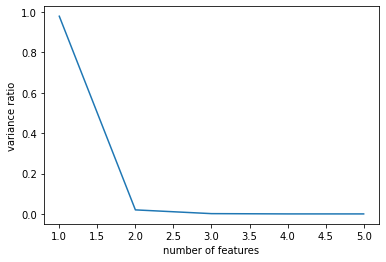

In [ ]:


x=np.arange(1,6)
y=pca.explained_variance_ratio_ 
plt.plot(x,y)
plt.xlabel('number of features')
plt.ylabel('variance ratio')


# two features are important. 

In [ ]:
#b
pca = PCA()
model=pca.fit_transform(X)
y=pca.explained_variance_ratio_ 
y
# only one feature is sufficient for 95% of variance 

# part 4
apply Naive Bayes algorithm before PCA and with PCA and evaluate/validate the results in 10 mc runs. 

In [ ]:
import time 

In [ ]:
#NB as normal 
start=time.time()
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)# split dataset
  model_dt=GaussianNB() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end=time.time()
proc=end-start
print(proc)

Accuracy using 1000 MC run: 0.9719259259259261
16.95407462120056


# New Section

# apply PCA+ NB 
# use only two compnents 

In [ ]:
#NB as normal 
start=time.time()
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)# split dataset
  model_dt=GaussianNB() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end=time.time()
proc=end-start
print(proc)

# Example: 
use **Iris** and 

1. apply PCA to extract the most 2 important features. 

2.  specify the ratio of variance for each component

3.  select the number of PCAs where at least 97% of information is preserved. 

# Example: 
use **Seed_data** and 

1. apply PCA and LDA to extract the most 2 important features. 

2.  Compute the ratio of variance of extracted features for both techniques 

3. Specify the most important features at the level of 95% for each technique

4. Use decision tree classifier and PCA/LDA to predict the **target** variable, using the extracted features, and evaluate both models in terms of accuracy



In [ ]:
 
data=read_csv('/content/Seed_Data.csv')
data.head()
X=data.drop(['target'],axis=1)
y=data['target']
X.shape
#y.unique()

(210, 7)

In [ ]:
#1 apply PCA 
pca = PCA(2)
model=pca.fit_transform(X)
# access values and vectors
df=pd.DataFrame(model) 
df.columns=['F1','F2']
df

,F1,F2
0,0.663448,-1.417321
1,0.315667,-2.689229
2,-0.660499,-1.131506
3,-1.055276,-1.621190
4,1.619999,-2.183384
...,...,...
205,-3.041872,-0.473126
206,-4.109063,0.109341
207,-2.500034,4.307965
208,-3.332079,-0.525290


In [ ]:
#1 apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) # LDA is supervised learning 
LDA=pd.DataFrame(X_lda)
LDA.columns=[['lda1','lda2']]
 
LDA.head()


,lda1,lda2
0,-0.431322,-3.447686
1,-0.752869,-4.183980
2,-1.093932,-2.958675
3,-1.768020,-3.252414
4,0.494411,-3.438485


In [ ]:
#b
 
pca = PCA()
model=pca.fit_transform(X)
pca.explained_variance_ratio_ 

array([8.29385197e-01, 1.63632452e-01, 5.65790880e-03, 9.90306086e-04,
       2.11180347e-04, 1.20677139e-04, 2.27879552e-06])

# note:
 we have to select the first and second pca to cover at least 95% variance 

In [ ]:
#b lda
lda_model.explained_variance_ratio_ 

array([0.68141241, 0.31858759])

# note:
 we have to select the first and second ldas to cover at least 95% variance 

# part 4
to apply decision tree with PCA at the level 95%, we use the first 2 pcas as the input features for the classifier 

In [ ]:
#PCA+DT
from sklearn.tree import DecisionTreeClassifier

start = time. time()

acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 1000 MC run: 0.8796190476190477
processing time: 9.308932542800903


In [ ]:
#LDA+DT
from sklearn.tree import DecisionTreeClassifier

start = time. time()

acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(LDA,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 1000 MC run: 0.9551746031746031
processing time: 6.787670850753784


#Example: 
Use wine dataset, apply dt classifier to predict the **class label** using the first two PCAs. 

In [ ]:
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result

Accuracy using 1000 MC run: 0.9087407407407407


# apply the dt model on pca1 and pca2

In [ ]:
EF=df_new[['pca1','pca2']]
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(EF,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result

Accuracy using 1000 MC run: 0.7052962962962963


# Example: train the dt classifier using 4 components and audit the accuracy in 1000 mc runs. 

In [ ]:
pca = PCA(4)
# fit on data
pca.fit(X)
# access values and vectors
PCAs=pca.components_
df=pd.DataFrame(PCAs)
df_pca=df.T  # transpose the dataframe 
df_pca.columns=['coef1','coef2','coef3','coef4']
df_new=np.dot(X, df_pca) # inner product

df_new_df=pd.DataFrame(df_new)
df_new_df.columns=['PCA1','PCA2','PCA3','PCA4'] # name of features

#apply dt classifier on PCAs
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(df_new_df,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc), np.std(acc))  # average of accuracy to stablize the result




Accuracy using 1000 MC run: 0.878037037037037 0.04505979870720249


Provide a strategy to increase the accuracy of dt model. 

#Excercise 1:
Use Iris dataset, consider the species as the target variable:
1.   Apply 4 Classifiers ( DTC, SVC, LRC, NBC) to develop and evaluate classifiers to find best classifier.
2.   Apply PCA and LDA to accomplish the task of dimensionality reduction.
3.    Retrain the best model with the transformed data resulting from PCA and LDA and evaluate the models.
4.    Specify the best model in terms of accuracy, with both LDA and PCA applied separately.




In [ ]:
#load the required libraries/functions
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 

In [ ]:
# get a list of models using a function  
def get_models():
  models=dict()
  #models['rf']=RandomForestClassifier(n_estimators=200)
  models['lr']=LogisticRegression()
  models['dt']=DecisionTreeClassifier()
  models['svm']=SVC()
  models['nb']=GaussianNB()
  return models

In [ ]:
models=get_models()

In [ ]:
# a function for model evaluation 
def evaluate_model(model, X, y):
  acc=[]
  for j in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    acc.append(accuracy)
    scores=np.mean(acc)
    return scores

In [ ]:
import sklearn.datasets as dts

iris = dts.load_iris()

X=iris.data
y=iris.target

In [ ]:
# apply the defined functions on the dataset
from numpy import mean, std
results, names=list() , list()
for name, model in models.items():
  scores=evaluate_model(model, X,y)
  results.append(scores)
  names.append(name)
  print(name, mean(scores),std(scores))

lr 0.9111111111111111 0.0
dt 0.9555555555555556 0.0
svm 0.9777777777777777 0.0
nb 0.9333333333333333 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#end of part 1

# part 2

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


LDA = LinearDiscriminantAnalysis()
X_iris_lda = LDA.fit_transform(X,y)
LDA=pd.DataFrame(X_iris_lda)
LDA.columns=['LDA1', 'LDA2']
LDA.head()

,LDA1,LDA2
0,8.061800,0.300421
1,7.128688,-0.786660
2,7.489828,-0.265384
3,6.813201,-0.670631
4,8.132309,0.514463


# apply the best model with LDA: svc()

In [ ]:
# apply the defined functions on the dataset
from numpy import mean, std
model=SVC()
scores=evaluate_model(model, LDA,y)
print('svc', scores)

svc 0.9777777777777777


#use svc wth pca to train the model and compute the accuracy

In [ ]:
 
pca = PCA(4)
# fit on data
pca.fit(X)
# access values and vectors
PCAs=pca.components_
Coef=pd.DataFrame(PCAs)
 

In [ ]:
 
df_pca=Coef.T  # transpose the dataframe 
df_pca.columns=['coef1','coef2','coef3','coef4']
df_new=np.dot(X, df_pca) # inner product

df_new=pd.DataFrame(df_new)
df_new.columns=['PCA1','PCA2','PCA3','PCA4'] # name of features
df_new.head(3)

,PCA1,PCA2,PCA3,PCA4
0,2.818240,5.646350,-0.659768,0.031089
1,2.788223,5.149951,-0.842317,-0.065675
2,2.613375,5.182003,-0.613952,0.013383


In [ ]:
# apply the defined functions on the dataset
from numpy import mean, std
model=SVC()
scores=evaluate_model(model, df_new,y)
print('svc', scores)

svc 1.0


# the best model is svc() with pca. 

# end of the example 

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.simplefilter('ignore')


lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Logistic Regression:',lr.score(X_test,y_test))


svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
print('Support Vector Classifier:',svc.score(X_test,y_test))


dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('Decision Tree:',dt.score(X_test,y_test))


rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print('Random Forest:',rf.score(X_test,y_test))

gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('GaussianNB:',gnb.score(X_test,y_test))


Logistic Regression: 0.9777777777777777
Support Vector Classifier: 0.9777777777777777
Decision Tree: 0.9777777777777777
Random Forest: 0.9777777777777777
GaussianNB: 0.9555555555555556


In [ ]:
X_iris=iris.data
y_iris=iris.target



In [ ]:
X_iris.shape

(150, 4)

In [ ]:
y_iris.shape

(150,)

In [ ]:
np.unique(y_iris)

array([0, 1, 2])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


LDA = LinearDiscriminantAnalysis()
X_iris_lda = LDA.fit_transform(X_iris,y_iris)
LDA=pd.DataFrame(X_iris_lda)
LDA.columns=['LDA1', 'LDA2']
LDA.head()

,LDA1,LDA2
0,8.061800,0.300421
1,7.128688,-0.786660
2,7.489828,-0.265384
3,6.813201,-0.670631
4,8.132309,0.514463


In [ ]:


import warnings 
warnings.simplefilter('ignore')
from time import time

svc = SVC()

acc=[]
t1=time()

for i in range(5000):
  X_train,X_test,y_train,y_test=train_test_split(X_iris_lda,y_iris,test_size=0.2,random_state=i)
  svc.fit(X_train,y_train)
  acc.append(svc.score(X_test,y_test))
print('SVM: Mean Accuracy = ',np.mean(acc),'Std Dev = ',np.std(acc),'Time to Run:',time()-t1)


SVM: Mean Accuracy =  0.9777066666666666 Std Dev =  0.024191517337924687 Time to Run: 6.219721794128418


#Excercise 2:
Use Cancer dataset, consider the diagnosis as the target variable:
1.   Apply 4 Classifiers (RFC, DTC, SVC, LRC) to develop and evaluate classifiers to find best classifier.
2.   Apply PCA and LDA to accomplish the task of dimensionality reduction.
3.    Retrain the best model with the transformed data resulting from PCA and LDA and evaluate the models.
4.    Specify the best model in terms of accuracy, with both LDA and PCA applied separately.




CANCER DETECTION

In [ ]:
from google.colab import files

df=files.upload()

Saving cancerdata.csv to cancerdata.csv


In [ ]:
import pandas as pd 

df=pd.read_csv('cancerdata.csv')

In [ ]:
df.shape

(340, 32)

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.5890,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.3980,74.08,0.005225,0.01308,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.5850,94.03,0.006150,0.04006,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.4450,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.4380,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,89742801,M,17.06,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.09934,0.1727,0.06071,0.8161,2.1290,6.0760,87.17,0.006455,0.01797,0.04502,0.017440,0.01829,0.003733,20.99,33.15,143.20,1362.0,0.1449,0.2053,0.3920,0.18270,0.2623,0.07599
336,897604,B,12.99,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,0.1652,0.07238,0.1814,0.6412,0.9219,14.41,0.005231,0.02305,0.03113,0.007315,0.01639,0.005701,13.72,16.91,87.38,576.0,0.1142,0.1975,0.1450,0.05850,0.2432,0.10090
337,897630,M,18.77,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.06090,0.1953,0.06083,0.6422,1.5300,4.3690,88.25,0.007548,0.03897,0.03914,0.018160,0.02168,0.004445,24.54,34.37,161.10,1873.0,0.1498,0.4827,0.4634,0.20480,0.3679,0.09870
338,897880,B,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,0.2619,2.0150,1.7780,16.85,0.007803,0.01449,0.01690,0.008043,0.02100,0.002778,11.16,26.84,71.98,384.0,0.1402,0.1402,0.1055,0.06499,0.2894,0.07664


In [ ]:
X=df.drop(['id','diagnosis'],axis=1)
y=df['diagnosis']

In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.5890,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.3980,74.08,0.005225,0.01308,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.5850,94.03,0.006150,0.04006,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.4450,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.4380,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,17.06,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.09934,0.1727,0.06071,0.8161,2.1290,6.0760,87.17,0.006455,0.01797,0.04502,0.017440,0.01829,0.003733,20.99,33.15,143.20,1362.0,0.1449,0.2053,0.3920,0.18270,0.2623,0.07599
336,12.99,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,0.1652,0.07238,0.1814,0.6412,0.9219,14.41,0.005231,0.02305,0.03113,0.007315,0.01639,0.005701,13.72,16.91,87.38,576.0,0.1142,0.1975,0.1450,0.05850,0.2432,0.10090
337,18.77,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.06090,0.1953,0.06083,0.6422,1.5300,4.3690,88.25,0.007548,0.03897,0.03914,0.018160,0.02168,0.004445,24.54,34.37,161.10,1873.0,0.1498,0.4827,0.4634,0.20480,0.3679,0.09870
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,0.2619,2.0150,1.7780,16.85,0.007803,0.01449,0.01690,0.008043,0.02100,0.002778,11.16,26.84,71.98,384.0,0.1402,0.1402,0.1055,0.06499,0.2894,0.07664


In [ ]:
import numpy as np 

np.unique(y)

array(['B', 'M'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

##Evaluate Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.simplefilter('ignore')


lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Logistic Regression:',lr.score(X_test,y_test))


svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
print('Support Vector Classifier:',svc.score(X_test,y_test))


dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('Decision Tree:',dt.score(X_test,y_test))


rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print('Random Forest:',rf.score(X_test,y_test))


mnb = MultinomialNB()
mnb.fit(X_train,y_train)
print('MultinomialNB:',mnb.score(X_test,y_test))


gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('GaussianNB:',gnb.score(X_test,y_test))


Logistic Regression: 0.9509803921568627
Support Vector Classifier: 0.9411764705882353
Linear SVC: 0.9313725490196079
Decision Tree: 0.8725490196078431
Random Forest: 0.9509803921568627
MultinomialNB: 0.8235294117647058
GaussianNB: 0.9215686274509803


##Evaluate Classifiers with 1000 Monte Carlo Runs

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.simplefilter('ignore')
from time import time


lr = LogisticRegression()
svc = SVC()
lsvc = LinearSVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()

models=[('LogisticRegression',lr),('SVC',svc),('LinearSVC',lsvc),('Decision Tree',dt),('Multinomial Naive Bayes',mnb),('Gaussian Naive Bayes',gnb),('Random Forest',rf)]

for modelname,model in models:
  acc=[]
  t1=time()
  for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    model.fit(X_train,y_train)
    acc.append(model.score(X_test,y_test))
  print(modelname,': Mean Accuracy = ',np.mean(acc),'Std Dev = ',np.std(acc),'Time to Run:',time()-t1)



LogisticRegression : Mean Accuracy =  0.9558088235294118 Std Dev =  0.025030150504063205 Time to Run: 32.455116510391235
SVC : Mean Accuracy =  0.9042205882352942 Std Dev =  0.032915664359201575 Time to Run: 5.960432529449463
LinearSVC : Mean Accuracy =  0.8866470588235293 Std Dev =  0.06976036590012291 Time to Run: 20.131623029708862
Decision Tree : Mean Accuracy =  0.9180588235294117 Std Dev =  0.03187757724162626 Time to Run: 6.936077356338501
Multinomial Naive Bayes : Mean Accuracy =  0.8774852941176471 Std Dev =  0.03607421883708479 Time to Run: 3.944396734237671
Gaussian Naive Bayes : Mean Accuracy =  0.93575 Std Dev =  0.027812548355387386 Time to Run: 3.496995210647583
Random Forest : Mean Accuracy =  0.9536323529411764 Std Dev =  0.024027769221707344 Time to Run: 178.2887773513794


##Apply LDA and Run Logistic Regression

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
X_lda = LDA.fit_transform(X,y)


In [ ]:
X_lda[:10]

array([[2.5287453 ],
       [1.84911157],
       [3.14985089],
       [3.54196606],
       [1.81444878],
       [1.28041797],
       [2.21925116],
       [1.28603933],
       [1.37622962],
       [3.05441274]])

In [ ]:

from sklearn.linear_model import LogisticRegression
import warnings 
warnings.simplefilter('ignore')
from time import time

lr = LogisticRegression()

acc=[]
t1=time()

for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X_lda,y,test_size=0.2,random_state=i)
  lr.fit(X_train,y_train)
  acc.append(lr.score(X_test,y_test))
print('Logistic Regression: Mean Accuracy = ',np.mean(acc),'Std Dev = ',np.std(acc),'Time to Run:',time()-t1)


Logistic Regression: Mean Accuracy =  0.9745294117647059 Std Dev =  0.018131679058132708 Time to Run: 4.930265188217163


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.simplefilter('ignore')
from time import time


lr = LogisticRegression()
svc = SVC()
lsvc = LinearSVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
#mnb = MultinomialNB()
gnb = GaussianNB()

models=[('LogisticRegression',lr),('SVC',svc),('LinearSVC',lsvc),('Decision Tree',dt),('Gaussian Naive Bayes',gnb)]#,('Random Forest',rf)]

for modelname,model in models:
  acc=[]
  t1=time()
  for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X_lda,y,test_size=0.2,random_state=i)
    model.fit(X_train,y_train)
    acc.append(model.score(X_test,y_test))
  print(modelname,': Mean Accuracy = ',np.mean(acc),'Std Dev = ',np.std(acc),'Time to Run:',time()-t1)



LogisticRegression : Mean Accuracy =  0.9745294117647059 Std Dev =  0.018131679058132708 Time to Run: 5.329296827316284
SVC : Mean Accuracy =  0.9731764705882353 Std Dev =  0.01943750521534438 Time to Run: 2.270609140396118
LinearSVC : Mean Accuracy =  0.9743823529411765 Std Dev =  0.017826514019182907 Time to Run: 1.9257497787475586
Decision Tree : Mean Accuracy =  0.9619117647058822 Std Dev =  0.021732388566440834 Time to Run: 1.7389912605285645
Gaussian Naive Bayes : Mean Accuracy =  0.9735 Std Dev =  0.018722130383318176 Time to Run: 1.9752147197723389


##Apply PCA and Run Logistic Regression

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(10)
pca.fit(X)

pca_comps = pca.components_
pca_comps_df = pd.DataFrame(pca_comps)
pca_comps_df=pca_comps_df.T
X_pca = np.dot(X,pca_comps_df)
X_pca_df = pd.DataFrame(X_pca)
X_pca_df

,0,1,2,3,4,5,6,7,8,9
0,2260.840604,-175.209981,42.345882,-85.347377,32.437431,-15.697934,-4.716120,-0.948124,0.756654,1.810677
1,2368.627440,127.664227,-66.548611,-54.632496,7.532098,-17.748724,-4.060049,-0.867771,2.148385,1.248484
2,2095.096248,152.311844,-35.064273,-68.020086,6.739562,-20.240678,-3.402215,-1.411935,1.729057,1.205811
3,692.621805,39.930976,-19.825020,-85.556744,8.357684,-16.219684,-2.274401,-1.120936,1.997231,1.145660
4,2028.922186,301.965654,-43.477819,-66.720993,16.002857,-16.712164,-3.595282,-0.637574,1.627327,1.147587
...,...,...,...,...,...,...,...,...,...,...
335,1651.220886,88.343780,-14.153803,-83.472791,4.971505,-14.826271,-5.611855,-0.110012,2.277857,1.463196
336,764.385396,144.176380,-43.991116,-66.820767,11.761984,-20.130154,-4.173189,-1.415382,1.325999,1.315792
337,2178.231536,-27.905724,-30.558385,-72.578852,3.871708,-17.831553,-6.550485,-0.854150,1.817284,1.481359
338,494.613680,69.541253,-21.010798,-68.685068,0.168167,-15.926457,-5.434928,-0.388041,1.610308,1.482031


###Explaining the variance for each component

In [ ]:
pca.explained_variance_ratio_

array([9.78243776e-01, 2.00526529e-02, 1.48232645e-03, 1.28670341e-04,
       8.04735968e-05, 6.82866563e-06, 3.79234176e-06, 8.45993239e-07,
       3.14351805e-07, 1.93260763e-07])

###Model Evaluation with PCA=10

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.simplefilter('ignore')
from time import time

lr = LogisticRegression()

acc=[]
t1=time()
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X_pca_df,y,test_size=0.2,random_state=i)
  lr.fit(X_train,y_train)
  acc.append(lr.score(X_test,y_test))
print('Logistic Regression: Mean Accuracy = ',np.mean(acc),'Std Dev = ',np.std(acc),'Time to Run:',time()-t1)


Logistic Regression: Mean Accuracy =  0.9549411764705882 Std Dev =  0.02477364656270532 Time to Run: 31.143234252929688


###Running PCAs from 1 to 30 to see the pattern

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.simplefilter('ignore')
from time import time

from sklearn.decomposition import PCA

lr = LogisticRegression()

for pca_cnt in range(1,30):
  X_pca_df = pd.DataFrame(np.dot(X,pd.DataFrame(PCA(pca_cnt).fit(X).components_).T))
  t1=time()
  acc=[]
  for i in range(100):
    X_train,X_test,y_train,y_test=train_test_split(X_pca_df,y,test_size=0.3,random_state=i)
    lr.fit(X_train,y_train)
    acc.append(lr.score(X_test,y_test))
  print('Logistic Regression - PCA ',pca_cnt,': Mean Accuracy = ',np.mean(acc),'Std Dev = ',np.std(acc),'Time to Run:',time()-t1)


###Use defualt-loan dataset, specify optimal number of clusters using KMeans
###Apply Classifiers on the Clusters to predict the defaulted? 
###Evaluate hybrid model in 1000 runs

(clustering+classification)

In [ ]:
from pandas import read_csv
data=read_csv('/content/Default_Loan_dataset.csv')
data=data.drop('Index',axis=1)
data.head()

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [ ]:
X=data.drop(['Defaulted'],axis=1)
y=data['Defaulted'] # only for classification task
data.head()

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [ ]:
!pip install kneed

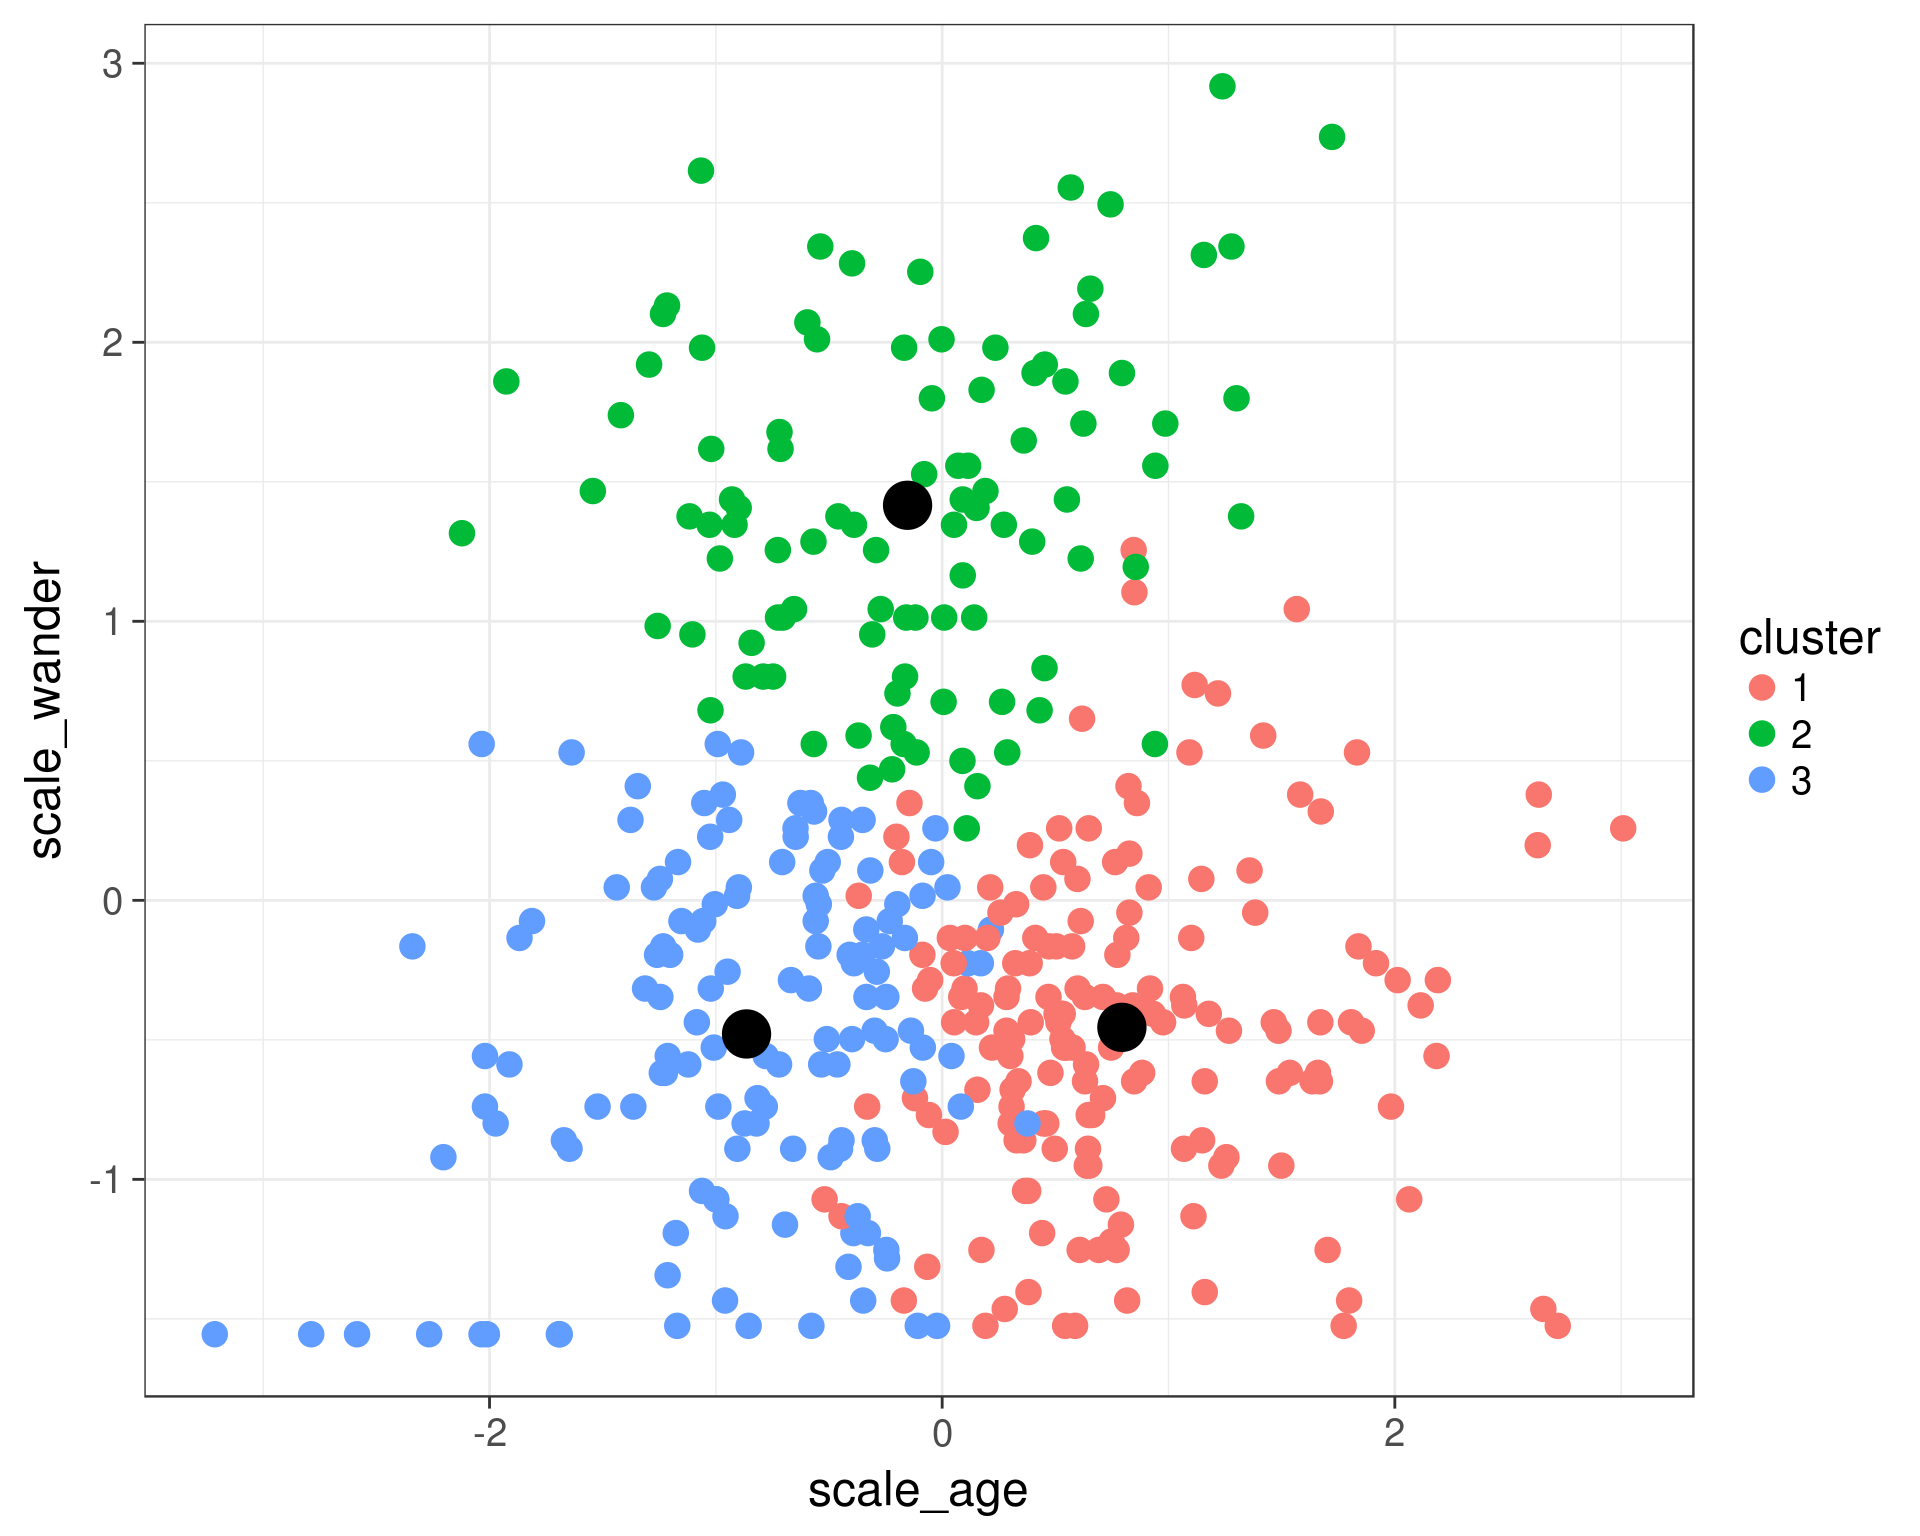

#Example:

apply kmeans clustering with three clusters on seed_data and print out the centroids for each cluster


In [ ]:
#data prepration 
from pandas import read_csv, DataFrame
data=read_csv('/content/Seed_Data.csv')
data.head()
X=data.drop('target',axis=1) # input variables 
X.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [ ]:
from sklearn.cluster import KMeans
model=KMeans(3)
model.fit(X) # unsupervised learning algorithm
centroids  = model.cluster_centers_   
centroids

array([[11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

In [ ]:
X['kmeans_cluster'] = model.labels_
X.head()

,A,P,C,LK,WK,A_Coef,LKG,kmeans_cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


# how many clusters are important?

In [ ]:
! pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator

In [ ]:
# A list holds the SSE values for each k
sse = [] # sum of squared error
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k)
   kmeans.fit(X) # unsupervised 
   sse.append(kmeans.inertia_)

In [ ]:

knee = KneeLocator(range(1,11),sse,curve='convex',direction='decreasing')
knee.elbow

3

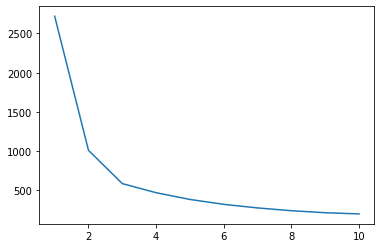

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),sse)

#complete Example 

Consider Boston_house_price dataset, RAD is output variable and other variables are inputs. 

1. Apply LDA and specify the number of LDAs which can explain 97% of variance. 

2. Redo the part (1) using PCA

3. do clustering analysis using kmeans to specify the best number of clusters. Labelize samples using Kmeans clustering. 



In [ ]:
data=read_csv('/content/boston_house_prices.csv')
y=data['RAD']
X=data.drop('RAD',axis=1)
X.head()
print(y.unique())
X.shape

[ 1  2  3  5  4  8  6  7 24]


(506, 13)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
 
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) # LDA is supervised learning 
df=pd.DataFrame(X_lda)

lda_model.explained_variance_ratio_
 

array([0.89051137, 0.05422261, 0.024758  , 0.01122588, 0.00847558,
       0.00528663, 0.00371171, 0.00180822])

#solution for part 1
4 features have to be considered to explain at least 97% of Variance. 

In [ ]:
#1 apply PCA 
pca = PCA()
model=pca.fit_transform(X)
# access values and vectors
df=pd.DataFrame(model) 
pca.explained_variance_ratio_ 

array([8.04532323e-01, 1.63015132e-01, 2.14504297e-02, 6.96906470e-03,
       2.00676022e-03, 1.16772994e-03, 4.22168776e-04, 3.25718756e-04,
       7.45730055e-05, 2.87600355e-05, 5.70657803e-06, 1.55416490e-06,
       7.87852633e-08])

In [ ]:
#solution for part 2
3 features have to be considered to explain at least 97% of Variance. 

In [ ]:
8.04532323e-01+ 1.63015132e-01+ 2.14504297e-02

0.9889978847

In [ ]:
# A list holds the SSE values for each k
sse = [] # sum of squared error
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k)
   kmeans.fit(X) # unsupervised 
   sse.append(kmeans.inertia_)

In [ ]:
knee = KneeLocator(range(1,11),sse,curve='convex',direction='decreasing')
knee.elbow

3

In [ ]:
model=KMeans(3)
model.fit(data)
centroids  = model.cluster_centers_   
centroids

In [ ]:
data['kmeans_cluster'] = model.labels_
data
 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,kmeans_cluster
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


# Example:

apply three classifiers to predict the variable kmeans_cluster in above dataset. 

In [ ]:
from pandas import read_csv, DataFrame  
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
y=data['kmeans_cluster']
X=data.drop('kmeans_cluster',axis=1)
X_train,X_test,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=23)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 #modelling part 2
lr=LogisticRegression()
lr.fit(X_train,ytrain)
pred_lr=lr.predict(X_test)
#
dt=DecisionTreeClassifier()
dt.fit(X_train,ytrain)
pred_dt=dt.predict(X_test)
#
rf=RandomForestClassifier()
rf.fit(X_train,ytrain)
pred_rf=rf.predict(X_test)



In [ ]:
 # model evaluation 
acc_lr=accuracy_score(pred_lr,ytest)
acc_dt=accuracy_score(pred_dt,ytest)
acc_rf=accuracy_score(pred_rf,ytest)
[acc_lr,acc_dt,acc_rf]


[0.9901960784313726, 0.9901960784313726, 0.9705882352941176]

In [ ]:
data['kmeans_cluster'] = km.labels_
data.head()

,Employed,Bank Balance,Annual Salary,Defaulted,kmeans_cluster
0,1,8754.36,532339.56,0,1
1,0,9806.16,145273.56,0,0
2,1,12882.60,381205.68,0,2
3,1,6351.00,428453.88,0,2
4,1,9427.92,461562.00,0,2


In [ ]:
X=data.drop(['Defaulted'],axis=1)
y=data['Defaulted']
X.head()

,Employed,Bank Balance,Annual Salary,kmeans_cluster
0,1,8754.36,532339.56,1
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,2
3,1,6351.00,428453.88,2
4,1,9427.92,461562.00,2


# apply logistic reg on original inputs+kmeans clustering output

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
lr = LogisticRegression()
acc=[]
for i in range(1000):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
  lr.fit(X_train,y_train)
  acc.append(lr.score(X_test,y_test))
print('Logistic Regression: Mean Accuracy = ',np.mean(acc),'StdDev = ',np.std(acc))

Logistic Regression: Mean Accuracy =  0.9663665 StdDev =  0.00354576194209369


In [ ]:
X_before=X.drop('kmeans_cluster',axis=1)
X_before.head()

# apply logistic reg before kmeans clustering

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
lr = LogisticRegression()
acc=[]
for i in range(1000):
  X_train,X_test,y_train,y_test = train_test_split(X_before,y,test_size=0.2,random_state=i)
  lr.fit(X_train,y_train)
  acc.append(lr.score(X_test,y_test))
print('Logistic Regression: Mean Accuracy = ',np.mean(acc),'StdDev = ',np.std(acc))

Logistic Regression: Mean Accuracy =  0.9663824999999999 StdDev =  0.0035605398116016077


###Using the Cluster Labels ALONE to predict the diagnosis

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
acc=[]
for i in range(1000):
  X_train,X_test,y_train,y_test = train_test_split(pd.DataFrame(df['kmeans_cluster']),y,test_size=0.2,random_state=i)
  lr.fit(X_train,y_train)
  acc.append(lr.score(X_test,y_test))
print('Logistic Regression: Mean Accuracy = ',np.mean(acc),'StdDev = ',np.std(acc))

Logistic Regression: Mean Accuracy =  0.8727941176470588 StdDev =  0.036212022225128745


###Using the Cluster Labels WITH other fields to predict diagnosis

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
acc=[]
for i in range(1000):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
  lr.fit(X_train,y_train)
  acc.append(lr.score(X_test,y_test))
print('Logistic Regression: Mean Accuracy = ',np.mean(acc),'StdDev = ',np.std(acc))

Logistic Regression: Mean Accuracy =  0.9561029411764705 StdDev =  0.025037925385551756


In [ ]:
import pandas as pd 

df=pd.read_csv('cancerdata.csv')

X=df.drop(['id','diagnosis'],axis=1)
y=df['diagnosis']

km = KMeans(n_clusters=2)
km.fit(X)

